# Optimization

Most of the content of this notebook is from

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

I changed and tested the code, so you will find differences from the original work of Mr. Johansson

In [1]:
#import numpy as np
#from numpy import polynomial as P
#from scipy import interpolate
#from scipy import linalg

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import sympy
sympy.init_printing()
from scipy import optimize

In [3]:
from __future__ import division

## Constrained optimization

### Bounds

In [4]:
def f(X):
    x, y = X
    return (x-1)**2 + (y-1)**2

In [5]:
print (optimize.minimize(f, (0, 0), method='BFGS'))

      fun: 1.0174381484248428e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([6.36252046e-10, 6.36252046e-10])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999999, 0.99999999])


In [6]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
print (x_opt)
print (optimize.minimize(f,np.array([0, 0]) , method='BFGS').x)
print (optimize.minimize(f,np.array([0, 0]) , method='BFGS').fun)

[0.99999999 0.99999999]
[0.99999999 0.99999999]
1.0174381484248428e-16


In [7]:
bnd_x1, bnd_x2 = (2, 3), (0, 2) # the boundaries

In [8]:
x_cons_opt = optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x
print (optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x)
print (optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).fun)
print (np.round(optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).jac,5))

[2. 1.]
1.0
[2. 0.]


In [9]:
optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2])

      fun: 1.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.99999999e+00, 2.22044605e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 2
   status: 0
  success: True
        x: array([2., 1.])

In [10]:
def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

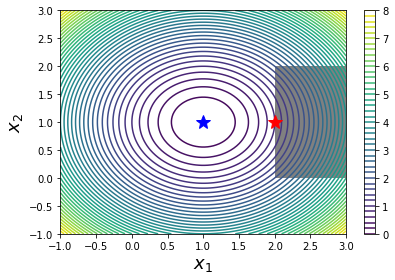

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y    = np.meshgrid(x_, y_)
c       = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), 
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
                           facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()

## Lagrange multiplier

In [12]:
x = x1, x2, x3, l = sympy.symbols("x_1, x_2, x_3, lambda")

In [13]:
f = x1 * x2 * x3

In [14]:
g = 2 * (x1 * x2 + x2 * x3 + x3 * x1) - 1

In [15]:
L = f + l * g

In [16]:
print( [x_ for x_ in x])

[x_1, x_2, x_3, lambda]


In [17]:
grad_L = [sympy.diff(L, x_) for x_ in x]
print (grad_L)

# Gradient
sympy.Matrix(grad_L)


[lambda*(2*x_2 + 2*x_3) + x_2*x_3, lambda*(2*x_1 + 2*x_3) + x_1*x_3, lambda*(2*x_1 + 2*x_2) + x_1*x_2, 2*x_1*x_2 + 2*x_1*x_3 + 2*x_2*x_3 - 1]


⎡    λ⋅(2⋅x₂ + 2⋅x₃) + x₂⋅x₃    ⎤
⎢                               ⎥
⎢    λ⋅(2⋅x₁ + 2⋅x₃) + x₁⋅x₃    ⎥
⎢                               ⎥
⎢    λ⋅(2⋅x₁ + 2⋅x₂) + x₁⋅x₂    ⎥
⎢                               ⎥
⎣2⋅x₁⋅x₂ + 2⋅x₁⋅x₃ + 2⋅x₂⋅x₃ - 1⎦

In [18]:
sols = sympy.solve(grad_L)
sols

In [19]:
# Gradient is zero at
sympy.Matrix(sols)

⎡  ⎧   -√6       √6      √6      √6⎫  ⎤
⎢  ⎨λ: ────, x₁: ──, x₂: ──, x₃: ──⎬  ⎥
⎢  ⎩    24       6       6       6 ⎭  ⎥
⎢                                     ⎥
⎢⎧   √6      -√6       -√6       -√6 ⎫⎥
⎢⎨λ: ──, x₁: ────, x₂: ────, x₃: ────⎬⎥
⎣⎩   24       6         6         6  ⎭⎦

In [20]:
print(sols[0])

{lambda: -sqrt(6)/24, x_1: sqrt(6)/6, x_2: sqrt(6)/6, x_3: sqrt(6)/6}


In [21]:
print(2*(3*(6**.5)/6.0*(6**.5)/6.0) - 1)

-1.1102230246251565e-16


In [22]:
g.subs(sols[0])

In [23]:
f.subs(sols[0])

In [24]:
import math
print (math.sqrt(6)/36.0)
print (math.sqrt(6)/24.0)

0.06804138174397717
0.10206207261596574


So Now I write 
f(X) and
g(X)

In [25]:
def f(X):
    return -X[0] * X[1] * X[2]

In [26]:
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

In [27]:
constraints = [dict(type='eq', fun=g)]

In [28]:
#result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', constraints=constraints, options={'disp': True})
result = optimize.minimize(f, [0.5, 1, 1.5],  method='SLSQP', constraints=constraints)
#, options={'grad':None, 'disp':3, 'iprint':3})

In [29]:
optimize.OptimizeResult.keys(result)

dict_keys(['x', 'fun', 'jac', 'nit', 'nfev', 'njev', 'status', 'message', 'success'])

In [30]:
result

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

In [31]:
result.x

array([0.40824188, 0.40825127, 0.40825165])

## Inequality constraints

In [32]:
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2

def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4

In [33]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
print (x_opt)

[0.99999999 0.99999999]


In [34]:
constraints = [dict(type='ineq', fun=g)]

In [35]:
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x
print (x_cons_opt)

[0.96857656 1.75228252]


In [36]:
x_cons_opt = optimize.minimize(f, (0, 0), method='COBYLA', constraints=constraints).x
print (x_cons_opt)

[0.96865024 1.75228559]


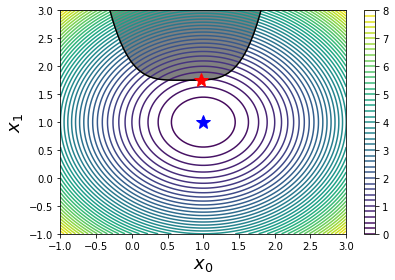

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)

ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color="grey")
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()

## Linear programming

In [38]:
# this is the function to minimize
def f(X):
    return (-X[0] + 2*X[1] - 3*X[2])

c = np.array([-1.0, 2.0, -3.0])

A = np.array([[ 1.0, 1.0, 0.0],
              [-1.0, 3.0, 0.0],
              [ 0.0, -1.0, 1.0]])

b = np.array([1.0, 2.0, 3.0])

In [ ]:
import cvxopt
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

In [ ]:
sol = cvxopt.solvers.lp(c_, A_, b_)

In [ ]:
x = np.array(sol['x'])

In [ ]:
x

In [ ]:
sol

In [ ]:
sol['primal objective']

In [ ]:
f(x)